In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("technical_challenge_DA/data/measurements.csv")

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
data2 = pd.read_excel("technical_challenge_DA/data/measurements2.xlsx")

In [5]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [69]:
data2.distance.value_counts()

11.8    37
16.0    24
12.3    23
12.4    18
15.4    14
        ..
44.9     1
36.6     1
9.9      1
16.8     1
14.7     1
Name: distance, Length: 174, dtype: int64

In [6]:
e10_price = 1.38
sp98_price = 1.46

# Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


## both datasets are the same. discarding the csv file because data types of the excel seem more accurate.

In [9]:
cars = data2

In [10]:
# has this column relevent information?
cars.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [11]:
# dropping columns with too many NaNs
cars = cars.drop(columns=["specials", "refill liters", "refill gas"])

In [12]:
# filling NaNs in temp_inside column with column mean
cars["temp_inside"] = cars["temp_inside"].fillna(round(cars["temp_inside"].mean(),2))

In [13]:
cars.isna().any()

distance        False
consume         False
speed           False
temp_inside     False
temp_outside    False
gas_type        False
AC              False
rain            False
sun             False
dtype: bool

In [14]:
cars

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


<AxesSubplot:ylabel='Frequency'>

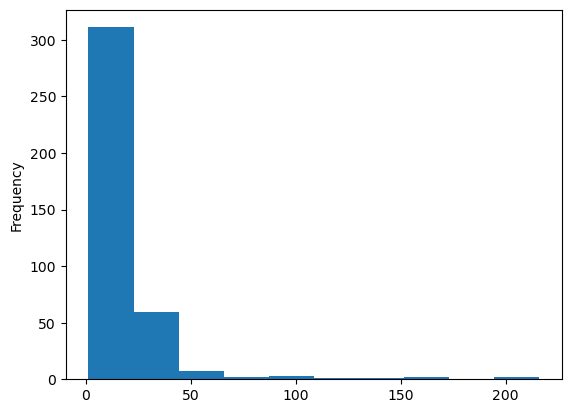

In [15]:
cars.distance.plot.hist()

a lot of very short drives. Usually the first few minutes have the highest consumption because the motor has to heat up first.

In [158]:
len(cars[cars["distance"]<30])/len(cars)

0.8865979381443299

<AxesSubplot:ylabel='Frequency'>

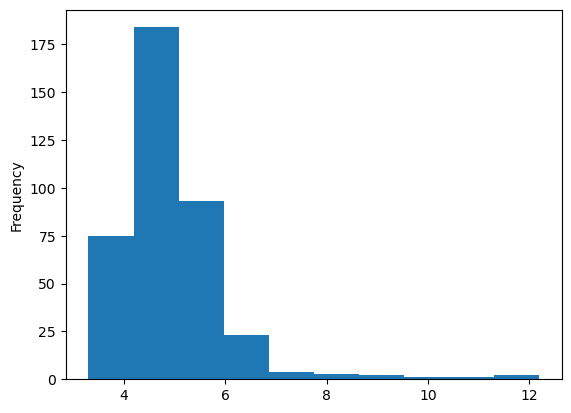

In [16]:
cars.consume.plot.hist()

<AxesSubplot:ylabel='Frequency'>

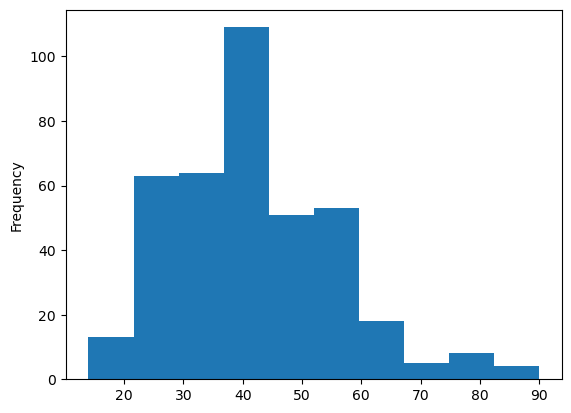

In [17]:
cars.speed.plot.hist()

### average speed is fairly low, probably mostly driving in cities with speed limits

In [18]:
# let's see the how many drives per gas_type there are
cars.groupby("gas_type")["consume"].size()

gas_type
E10     160
SP98    228
Name: consume, dtype: int64

In [19]:
# compare the means
cars.groupby("gas_type")["consume"].mean()

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64

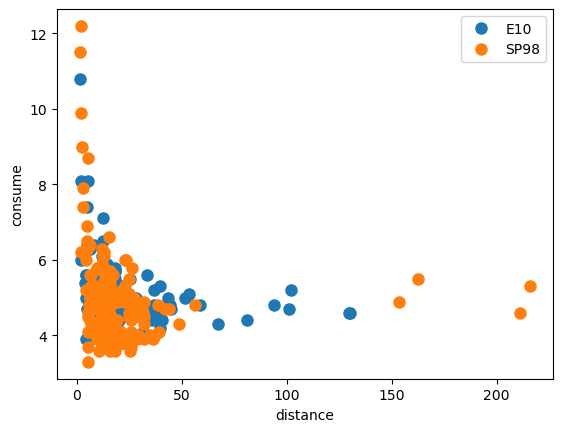

In [20]:
# how do the gas_types compare in distance and consumption
groups = cars.groupby('gas_type')
for name, group in groups:
    plt.plot(group.distance, group.consume, marker='o', linestyle='', markersize=8, label=name)
plt.xlabel("distance")
plt.ylabel("consume")
plt.legend()

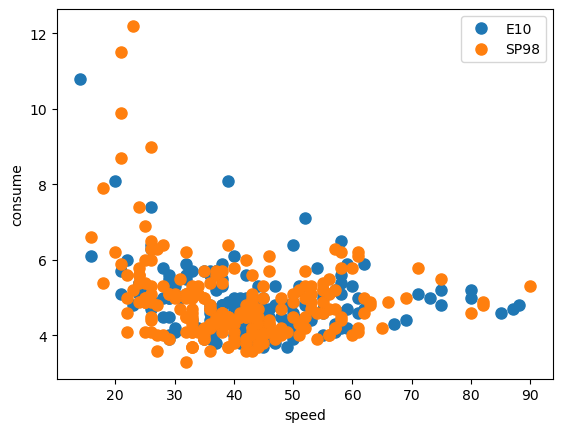

In [21]:
# How do the gas_types compare in speed and consumption
for name, group in groups:
    plt.plot(group.speed, group.consume, marker='o', linestyle='', markersize=8, label=name)
plt.xlabel("speed")
plt.ylabel("consume")
plt.legend()

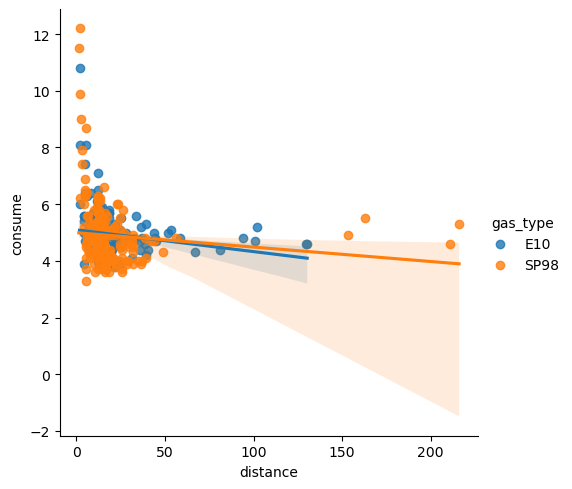

In [22]:
# first look at regression
sns.lmplot(data=cars, hue="gas_type", x = 'distance', y = 'consume')
plt.show()

This graph gives us a first comparison between the two gas types. It seems that at shorter distances E10 is slightly less efficient, but the longer the distance travelled the more efficient E10 becomes.

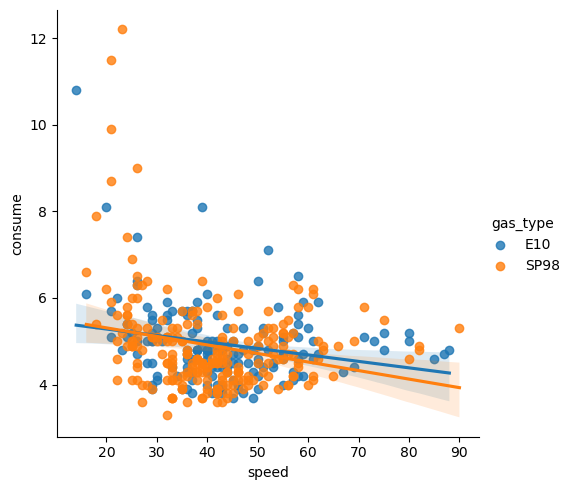

In [23]:
sns.lmplot(data=cars, hue="gas_type", x = 'speed', y = 'consume')
plt.show()

the lines indicate that at lower speeds E10 is more efficient and at higher speeds SP98 consumes less.

In [24]:
cars_e10 = cars[cars["gas_type"] == "E10"]
cars_sp98 = cars[cars["gas_type"] == "SP98"]

In [56]:
# how much does it cost for 100km on average with e10
cars_e10.consume.mean()*e10_price

6.805125

In [57]:
# how much does it cost for 100km on average with sp98
cars_sp98.consume.mean()*sp98_price

7.152719298245613

In [30]:
# label the gas types as 0 for e10 and 1 for sp98
cars["gas_type_int"] = cars["gas_type"].apply(lambda x: 0 if x == "E10" else 1)

C:\Users\nicol\AppData\Local\Temp/ipykernel_11872/2046328263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = cars.corr() # create the correlations


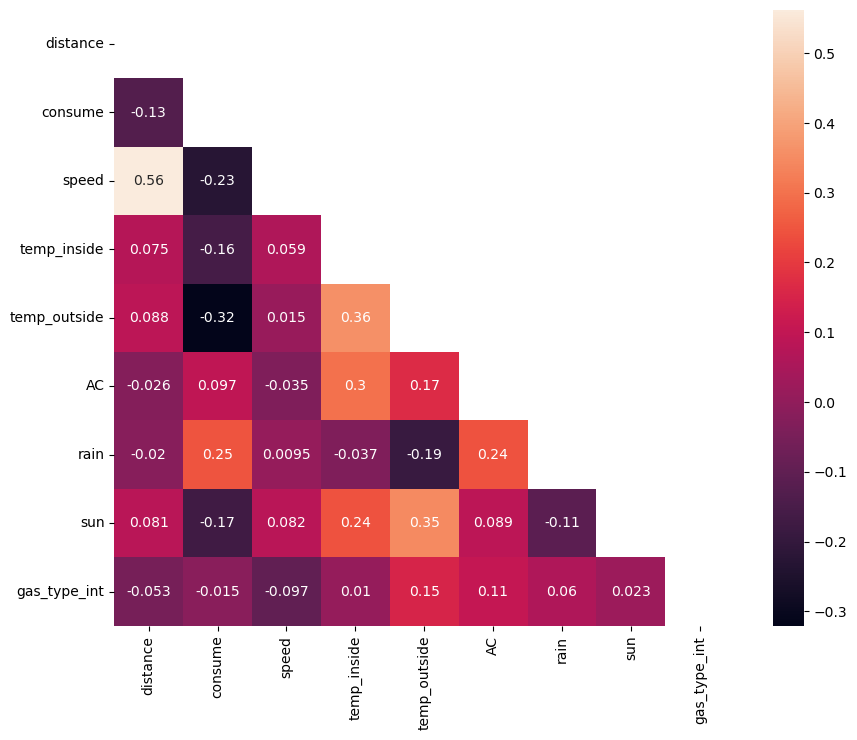

In [43]:
correlations = cars.corr() # create the correlations

mask = np.zeros_like(correlations) # create an array with size of correlations

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations, mask=mask, annot=True)
plt.show()

correlation matrix indicates no correlations for gas type

## Predictions

I suspect that the distance travelled plays an important role

In [121]:
short_drives = cars[cars["distance"] < 15]

In [122]:
long_drives = cars[cars["distance"] >= 15]

In [123]:
short_drives.groupby("gas_type")["consume"].mean()

gas_type
E10     5.283784
SP98    5.258678
Name: consume, dtype: float64

In [148]:
long_drives.groupby("gas_type")["consume"].mean()

gas_type
E10     4.627907
SP98    4.492523
Name: consume, dtype: float64

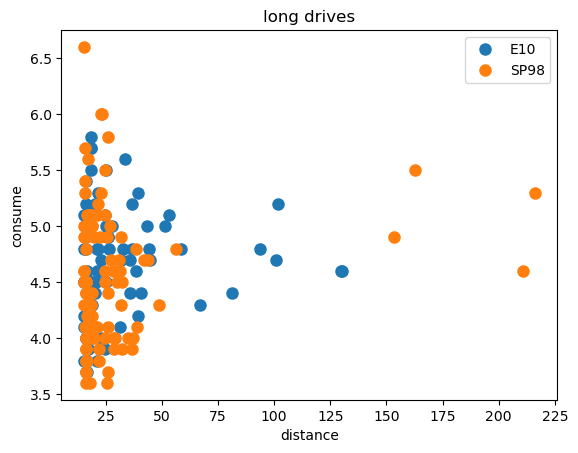

In [151]:
# another look at the gas types, this time for long drives
groups = long_drives.groupby('gas_type')
for name, group in groups:
    plt.plot(group.distance, group.consume, marker='o', linestyle='', markersize=8, label=name)
plt.title("long drives")
plt.xlabel("distance")
plt.ylabel("consume")
plt.legend()

In [147]:
e10_price, sp98_price = short_drives.groupby("gas_type")["consume"].mean()
print("price per 100km for e10:", e10_price, "for sp98:", sp98_price)

price per 100km for e10: 5.283783783783784 for sp98: 5.2586776859504125


In [146]:
e10_price, sp98_price = long_drives.groupby("gas_type")["consume"].mean()
print("price per 100km for e10:", e10_price, "for sp98:", sp98_price)

price per 100km for e10: 4.627906976744186 for sp98: 4.492523364485981


seperating the data into shorter and longer drives shows that longer drives favour the sp98 gas.

shorter drives are very similar in consumption and also very similar in price.

### predicting the amount consumed with linear regression

In [126]:
cars["short_drive"] =  cars["distance"].apply(lambda x: 0 if x <15 else 1)

In [127]:
cars.short_drive.value_counts()

0    195
1    193
Name: short_drive, dtype: int64

In [128]:
X = cars.drop(["consume","gas_type"], axis = 1)

In [129]:
y = cars.consume

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [131]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
lreg = LinearRegression()

In [133]:
lreg.fit(X_train,y_train)

LinearRegression()

In [134]:
print("train:", lreg.score(X_train, y_train))
print("test:", lreg.score(X_test, y_test))

train: 0.28332509989572885
test: 0.16800956649916854


### predicting the gas type with logistic regression

In [135]:
logreg = LogisticRegression()

In [136]:
X = cars.drop(["gas_type_int","gas_type"], axis = 1)

In [137]:
y = cars.gas_type_int

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [139]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [141]:
print("train:", logreg.score(X_train, y_train))
print("test:", logreg.score(X_test, y_test))

train: 0.6516129032258065
test: 0.5512820512820513


# Conclusion

This dataset has about 400 entries, with more data on the SP98 gas type (1:0.7 ratio). 

Enough to make some predictions.

As we can see in the plots, most of the drives done here are fairly short, with about 90% of all drives being shorter than 30km.

A cold motor uses gas to heat up, so first few minutes are generally very consuming. 

How important this first heat up phase is can be analyzed deeper.

We can see from the line plots that with greater distance travelled the confidence intervall for SP98 gets a lot bigger.

When we compare the means of the shorter travels we can see that there is not a big difference between the two gas types and price per 100km.

However when looking at longer drives (above 15km) we can see a larger gap in the amount of gas consumed, as well as a lower price per 100km for the SP98.

Regarding the regression models; predicting the amount consumed even when adding another column that indicates whether a long or a short drive took place did not deliver good scores. A linear regression model is probably unable to catch the complexity of the data. To further improve scores different scaler can be used (e.g. polynomial scaler) or different regression models, such as a Random Forest Regressor or Gradient Boosting Regressor.

The classification task delivered somewhat better scores. Using a Random Forest Classifier can probably deliver better results here.

All in all there seems to be no big difference in what gas type is used when looking at shorter drives (E10 is a few cents cheaper), however once the motor is warm SP98 is the better choice, with lower consumption and lower price per 100km. 

To get better results I would recommend adding more features similar to the long/short drives i added.